# LIF

## SNN doc
https://snntorch.readthedocs.io/en/latest/tutorials/tutorial_2.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def lif(U, time_step=1e-3, I=0, R=5e7, C=1e-10): #Euleur method on the DE of the RC circuit
    tau = R*C
    U += (time_step/tau)*(-U + I*R)
    return U

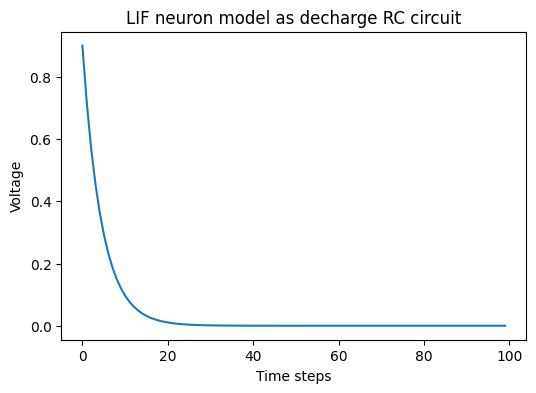

In [3]:
num_steps = 100
U = 0.9
U_trace = []


for step in range(num_steps):
    U_trace.append(U)
    U = lif(U)
    
plt.figure(figsize=(6,4))
plt.plot(U_trace)
plt.xlabel('Time steps')
plt.ylabel('Voltage')
plt.title('LIF neuron model as decharge RC circuit')
plt.show()

## Lapicque's Model

In [4]:
def lapicque(U, I=0, time_step=1e-3, R=5, C=1e-3):
    tau = R*C
    U += (time_step/tau)*(-U + I*R)
    return U

In [5]:
num_steps = 100
U = 0
U_trace1 = []
I1 = []

for step in range(num_steps):
    if step >=9: # curretn input a t0 = 10ms bc time step = 1ms
        U_trace1.append(U)
        I1.append(100e-3)
        U = lapicque(U, 100e-3)
    else:
        U_trace1.append(U)
        I1.append(0)

        U = lapicque(U)
        


In [6]:
num_steps = 100
U = 0
U_trace2 = []
I2 = []
for step in range(num_steps):
    if step >=9 and step < 30: # curretn input a t0 = 10ms bc time step = 1ms
        U_trace2.append(U)
        U = lapicque(U, 100e-3)
        I2.append(100e-3)
    else:
        U_trace2.append(U)
        U = lapicque(U)
        I2.append(0)
    


In [7]:
num_steps = 100
U = 0
U_trace3 = []
I3 = []
for step in range(num_steps):
    if step >=9 and step < 15: # curretn input a t0 = 10ms bc time step = 1ms
        U_trace3.append(U)
        U = lapicque(U, 150e-3)
        I3.append(150e-3)
    else:
        U_trace3.append(U)
        U = lapicque(U)
        I3.append(0)
  

In [8]:
num_steps = 100
U = 0
U_trace4 = []
I4 = []
for step in range(num_steps):
    if step >=9 and step < 40: # curretn input a t0 = 10ms bc time step = 1ms
        U_trace4.append(U)
        U = lapicque(U, 90e-3)
        I4.append(90e-3)
    else:
        U_trace4.append(U)
        U = lapicque(U)
        I4.append(0)
    


In [9]:
num_steps = 100
U = 0
U_trace5 = []
I5 = []
for step in range(num_steps):
    if step >=9 and step < 10: # curretn input a t0 = 10ms bc time step = 1ms
        U_trace5.append(U)
        U = lapicque(U, 500e-3)
        I5.append(500e-3)
    else:
        U_trace5.append(U)
        U = lapicque(U)
        I5.append(0)
    

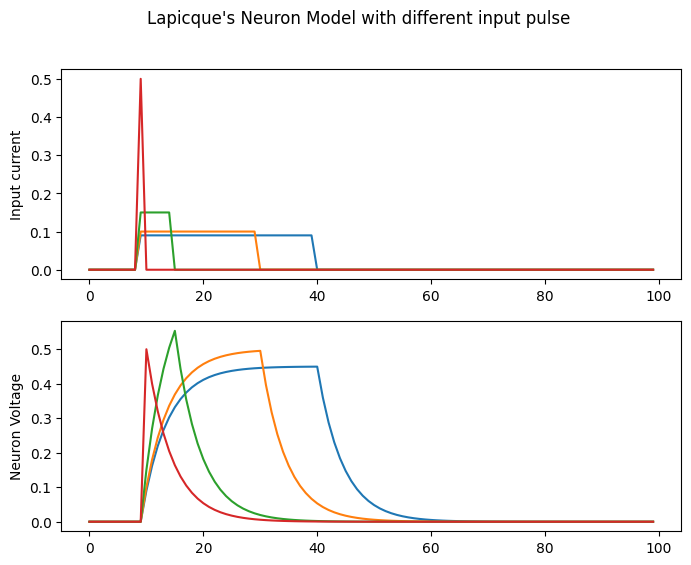

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(8,6))
fig.suptitle('Lapicque\'s Neuron Model with different input pulse ')
ax[0].plot(I4)
ax[0].plot(I2)
ax[0].plot(I3)
ax[0].plot(I5)
ax[0].set_ylabel('Input current')

ax[1].plot(U_trace4)
ax[1].plot(U_trace2)
ax[1].plot(U_trace3)
ax[1].plot(U_trace5)
ax[1].set_ylabel('Neuron Voltage')


plt.show()


## LIF Neuron w constant current input 

In [11]:
threshold = -55.
Ureset = -75.
tau = 10.
R = 1/10.
Uinit = -65
Urest = -75.
tref = 2 #refractory time (phase of hyperpolarization)


In [12]:
T = 400.
dt = .1
range_t = np.arange(0, T, dt)
print(range_t.shape)

(4000,)


In [13]:
u = np.zeros(range_t.shape[0])
u[0] = Uinit
I = 300.
I = I * np.ones(range_t.shape[0])
tr = 0.
rec_spikes = []
for i in range(range_t.shape[0]-1):
    if tr>0:
        u[i] = Urest
        tr = tr-1
    elif u[i] > threshold:
        rec_spikes.append(i)
        u[i] = Ureset
        tr = tref

    du = (dt/tau) * (-(u[i] - Urest) + R * I[i])
    u[i+1] = u[i] + du

rec_spikes = np.array(rec_spikes) * dt

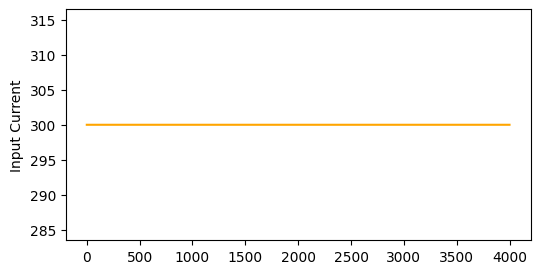

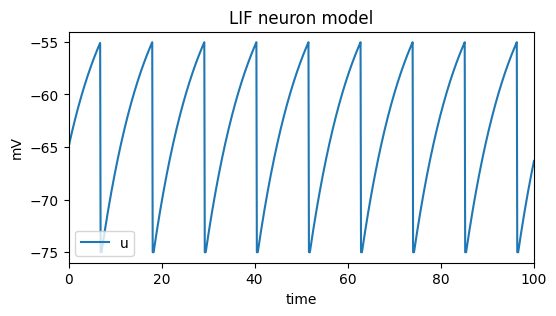

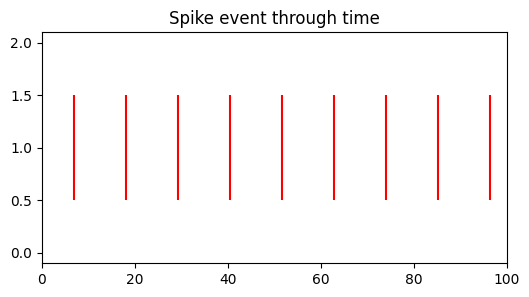

In [14]:
fig = plt.figure(figsize=(6,3))
plt.plot(I, color='orange')
plt.ylabel('Input Current')
plt.show()

fig = plt.figure(figsize = (6,3))
plt.plot(range_t, u, label='u')
plt.legend()
plt.xlim(0, 100)
plt.xlabel('time')
plt.ylabel('mV')
plt.title('LIF neuron model')
plt.show()

fig = plt.figure(figsize=(6,3))
plt.eventplot(rec_spikes, color='red')
plt.xlim(0, 100)
plt.title('Spike event through time')
plt.show()

## Poisson Spike Generator
https://medium.com/@baxterbarlow/poisson-spike-generators-stochastic-theory-to-python-code-a76f8cc7cc32

In [15]:
def generate_poisson_spikes(rate, T):
    spike_times = []
    t=0
    while t<T:
        interval = -np.log(np.random.rand()) / rate
        t+= interval

        if t<T:
            spike_times.append(t)

    return spike_times

        

In [16]:
rate = 5 # spikes/s
T = 10 # total duration in s
spike_times = generate_poisson_spikes(5, T)

In [17]:
def r(t):
    return 5 + 2 * np.sin(2*np.pi*t / 5)

In [18]:
def generate_inhomogeneous_posson_spikes(rate_func, T, dt=0.001):
    spike_times = []
    t = 0

    while t<T:
        rate = r(t)
        if rate * dt > np.random.rand():
            spike_times.append(t)
        t +=dt
    return spike_times
    
    
        

In [19]:
T = 10
spike_times = generate_inhomogeneous_posson_spikes(r, T)

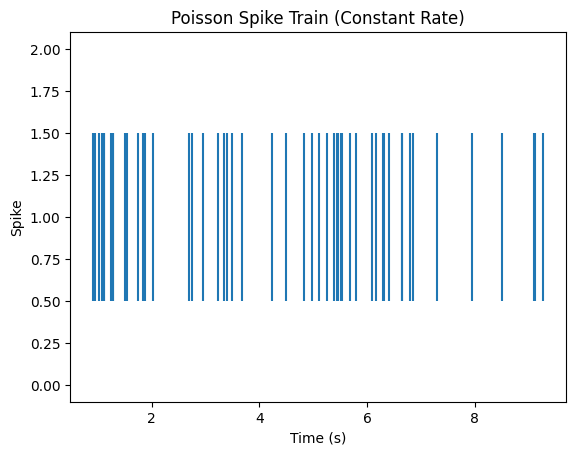

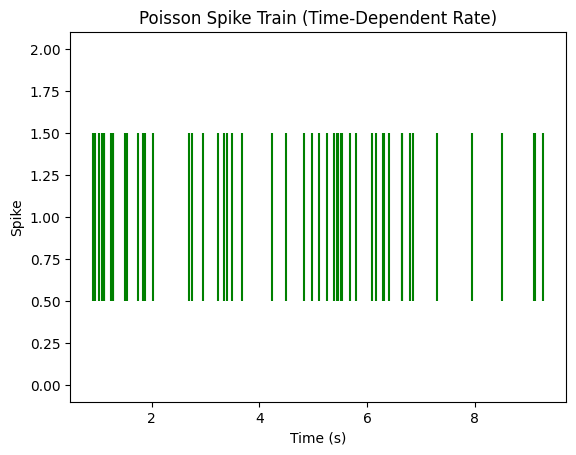

In [20]:
plt.eventplot(spike_times, orientation='horizontal')
plt.xlabel('Time (s)')
plt.ylabel('Spike')
plt.title('Poisson Spike Train (Constant Rate)')
plt.show()

plt.eventplot(spike_times, orientation='horizontal', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Spike')
plt.title('Poisson Spike Train (Time-Dependent Rate)')
plt.show()


## Test Lapicque's Neuron Model with Input Spikes 

In [21]:
rate = 20 # spikes/s
T = 3 # total duration in s
spike_times = generate_poisson_spikes(rate, T)

3000
50


[]

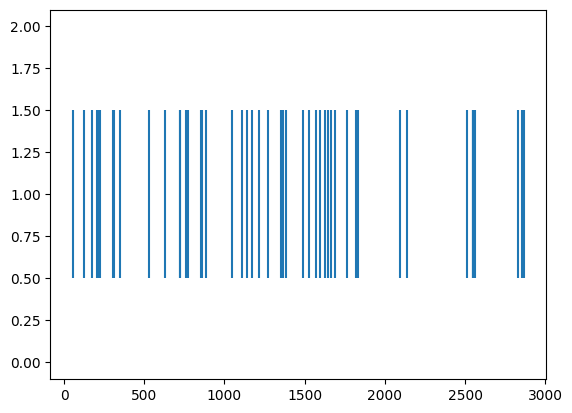

In [22]:
range_t = np.linspace(0, 3, 3000)
print(range_t.shape[0])#ms
spike_inputs = np.digitize(spike_times, range_t)
print(spike_inputs.shape[0])
plt.figure()
plt.eventplot(spike_inputs)
plt.plot()

In [23]:
def lif_fire(U, U_reset, I=0, threshold=0.5, time_step=1e-3, R=5.1, C=5e-3):
    if U > threshold:
        return U_reset, True
    else:
        tau = R*C
        U += (time_step/tau)*(-U + I*R)
        return U, False

In [24]:
I = 1.4

In [25]:
I_trace = np.zeros(range_t.shape[0])
I_trace[spike_inputs] = I

In [26]:
U = 0.8
U_reset = 0
U_trace = []
threshold = 0.3
spike_outputs = []
print(range_t.shape[0])
for step in range(range_t.shape[0]):
    U_trace.append(U)
    U, s = lif_fire(U, U_reset, I_trace[step], threshold)
    if s:
        spike_outputs.append(step)
print(spike_outputs)

3000
[0, 178, 222, 311, 726, 765, 860, 1110, 1170, 1271, 1366, 1531, 1599, 1647, 1688, 1820, 1831, 2142, 2549, 2564, 2859]


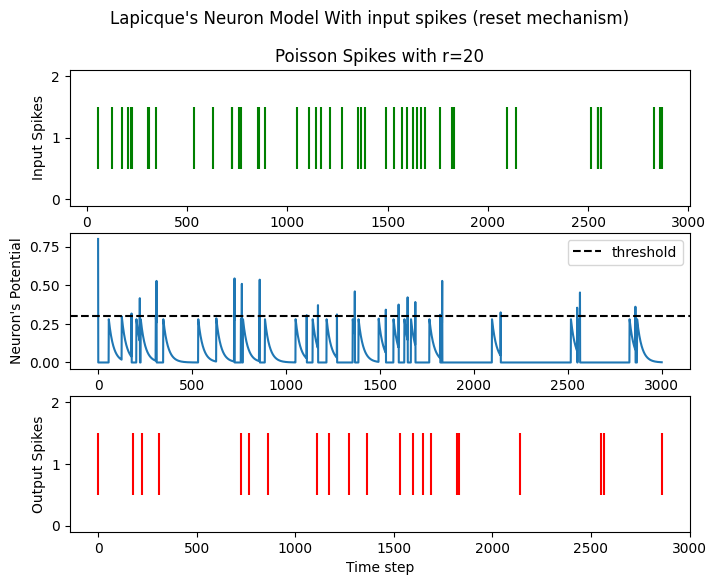

In [27]:
fig, ax = plt.subplots(3, 1, figsize=(8,6))
fig.suptitle('Lapicque\'s Neuron Model With input spikes (reset mechanism)')
ax[0].eventplot(spike_inputs, color='green')
ax[0].set_ylabel('Input Spikes')
ax[0].set_title('Poisson Spikes with r=%d' %rate)

ax[1].plot(U_trace)
ax[1].axhline(threshold, linestyle='--', color='black', label='threshold')
ax[1].legend()
ax[1].set_ylabel('Neuron\'s Potential')

ax[2].eventplot(spike_outputs, color='red')
ax[2].set_ylabel('Output Spikes')
ax[2].set_xlabel('Time step')

plt.show()


## First try of creating basic LIF NN

In [28]:
class PoissonSpikeGenerator:
 
    def __init__(self, T, dt):
        self.T = T
        self.dt = dt

    def generate_continous(self, rate):
        spike_times = []
        t=0
        while t<self.T:
            interval = -np.log(np.random.rand()) / rate
            t+= interval
            if t<self.T:
                spike_times.append(t)

        return spike_times

    def discretize(self, rate):
        range_t = np.linspace(0, T, int(self.T/self.dt))

        print(f'discretize() {int(self.T/self.dt)}')
        spike_times = self.generate_continous(rate)
        spike_inputs = np.digitize(spike_times, range_t)
        return spike_inputs

        
    def spike_inputs(self, d, rate, I):
        range_t = np.linspace(0, self.T, int(self.T/self.dt))
        I_trace = np.zeros(range_t.shape[0])
        I_trace[spike_inputs] = I
        return I_trace
        
          
        

In [29]:
def lif_fire(U, U_reset, I=0, threshold=0.5, time_step=1e-3, R=5.1, C=5e-3):
    if U > threshold:
        return U_reset, True
    else:
        tau = R*C
        U += (time_step/tau)*(-U + I*R)
        return U, False

for step in range(range_t.shape[0]):
    U_trace.append(U)
    U, s = lif_fire(U, U_reset, I_trace[step], threshold)
    if s:
        spike_outputs.append(step)

## Notes

- euleur iteraion doit recevoir juste un float et pas la liste des float
- plot doit afficher uniquement ce qui concerne LIF donc pas I_trace

In [39]:
class LIF:
    def __init__(self, U_init, U_reset, dt, T, R, C, threshold):
        self.U_init = U_init
        self.U_reset = U_reset
        self.threshold = threshold
        self.dt = dt
        self.R = R
        self.C = C
        self.U = U_init
        self.step = 0
        self.T = T
        self.U_trace = []
        self.spike_trace = []
 
    def euler_iteration(self, I):
        self.U_trace.append(self.U)

        if self.U > self.threshold:
            self.U = self.U_reset
            self.spike_trace.append(self.step)
            self.step+=1
            return self.U
        
        else:
            tau = self.R * self.C
            self.U += (self.dt/tau) * (-self.U + I[self.step]*self.R)
            self.step+=1
            return self.U

    def reset(self):
        self.U= self.U_init
        self.U_trace = []
        self.spike_trace = []
        self.step = 0

    def plot(self, d, rate):
        fig, ax = plt.subplots(3,1, figsize=(8,6))
        fig.suptitle('Lapicque\'s Neuron Model With input spikes (reset mechanism)')
        ax[0].eventplot(d, color='green')
        ax[0].set_ylabel('Input Spikes')
        ax[0].set_title('Poisson Spikes with r=%d' %rate)
        
        ax[1].plot(self.U_trace)
        ax[1].axhline(self.threshold, linestyle='--', color='black', label='threshold')
        ax[1].legend()
        ax[1].set_ylabel('Neuron\'s Potential')
        
        ax[2].eventplot(self.spike_trace, color='red')
        ax[2].set_ylabel('Output Spikes')
        ax[2].set_xlabel('Time step')
        
        plt.show()

    def paramaters(self):
        print(f'Model\'s parameters')
        print(f'U_init : {self.U_init}')
        print(f'U_reset : {self.U_reset}')
        print(f'threshold : {self.threshold}')
        print(f'dt : {self.dt}')
        print(f'T : {self.T}')
        print(f'R : {self.R}')
        print(f'C : {self.C}')
        print(f'U : {self.U}')
        print(f'step : {self.step}')





3 0.001
discretize() 3000


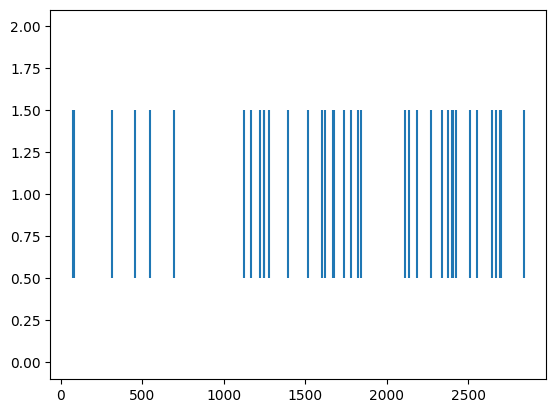

In [40]:
generator = PoissonSpikeGenerator(3, 1e-3)
print(generator.T, generator.dt)
rate =15
d = generator.discretize(rate)

plt.figure()
plt.eventplot(d)
plt.show()

In [41]:
lif1 = LIF(0.4, 0, 1e-3, 3, 5.1, 5e-3, 0.3)
lif1.paramaters()
I = 1.4
rate = 15
I_trace = generator.spike_inputs(d, rate, I)
T = lif1.T
dt = lif1.dt
print(I_trace[:100])

Model's parameters
U_init : 0.4
U_reset : 0
threshold : 0.3
dt : 0.001
T : 3
R : 5.1
C : 0.005
U : 0.4
step : 0
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  1.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


In [42]:
lif1.reset()
print(T)
print(dt)
print(int(T/dt))
for step in range(int(T/dt)):
    lif1.euler_iteration(I_trace)


3
0.001
3000


In [43]:
print(lif1.U_trace[0])
print(lif1.U_init)
print(lif1.U)
print(lif1.spike_trace)

0.4
0.4
0.0014248769144436075
[0, 178, 222, 311, 726, 765, 860, 1110, 1170, 1271, 1366, 1531, 1599, 1647, 1688, 1820, 1831, 2142, 2549, 2564, 2859]


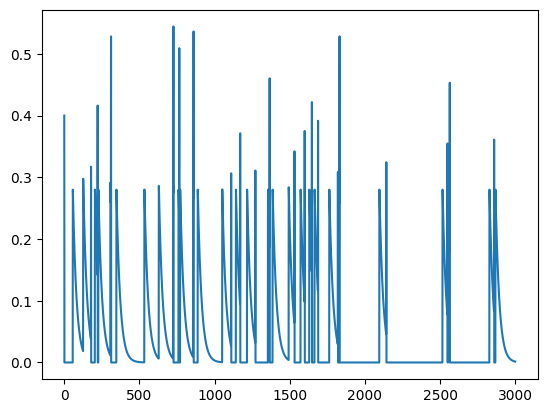

In [44]:
plt.figure()
plt.plot(lif1.U_trace)

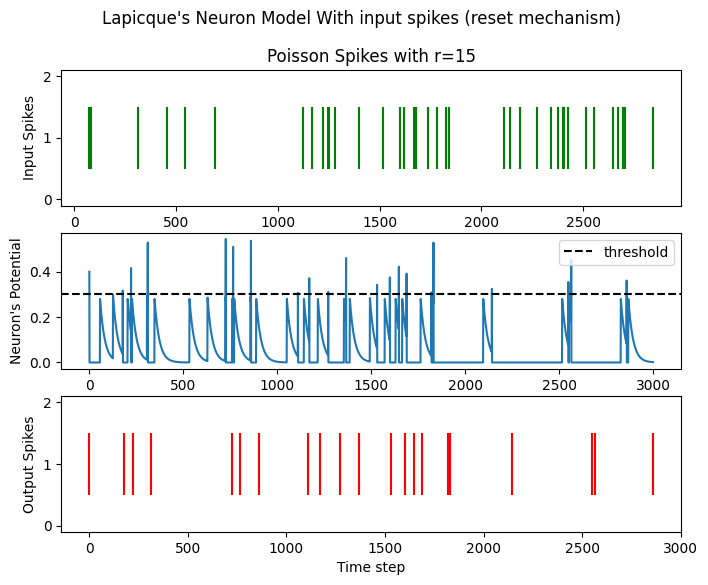

In [45]:
lif1.plot(d, rate)

## Spiking RNN but without training i.e just the reservoir for LSM
https://www.pnas.org/doi/10.1073/pnas.1905926116

Idea:
- Build an Spiking RNN
- Probability of a neuron being inhibitory
- Reccurent connection probability
- W_dist : recurrent wieght distribution
- tref : refractory time
- 

### A basic one

### 

In [46]:
class nnLIF:
    def __init__(self, N, dt, T, R, C, threshold):
        self.N = N
        self.dt = dt
        self.T = T
        self.R = R
        self.C = C
        self.threshold = threshold
        self.W = np.zeros((N,N))
        self.liquid_state = np.zeros(N)
        self.neurons = np.ndarray((N,), dtype=np.object_) 
        for n in range (N):
            self.neurons[n] = LIF(0.4, 0, self.dt, self.T, self.R, self.C, self.threshold)
            liquid_state[n] = self.neurons[n].U
        
    def next_step(self, I):
        for n in range(self.N):
            self.neurons[n].euler_iteration(I)
        
        

In [47]:
nnLIF = nnLIF(5, 1e-3, 3, 5.1, 5e-3, 0.4)